## Import

In [1]:
#import
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

# from matplotlib import style
import seaborn as sns
%matplotlib inline

import acquire as a
import prepare as prep


from IPython.display import display, display_html

# Acquire

- we aquire a data set  from "anonymized-curriculum-access-07-2021.txt (df1)
- we acquire cohorts table from sql (df2)
- we merge both tables df1 and df2 using left join so we can keep all df1 observations and columns and add df2 columns
- before the merge we drop colums ['deleted_at' , 'slack']

In [2]:
#use my functions
df = a.acquire()

In [3]:
df.head()

,date,endpoint,user_id,cohort_id,source_ip,name,start_date,end_date,created_at,updated_at,program_id
0,2018-01-26,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
1,2018-01-26,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2,2018-01-26,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
3,2018-01-26,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
4,2018-01-26,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0


In [4]:
#use my function to check missing values
a.miss_dup_values(df)

Your selected dataframe has 11 columns.
There are 8 columns that have missing values.
  
** There are 394392 duplicate rows that represents 38.71% of total Values**


,Missing Values,% of Total Values
name,64497,6.3
start_date,64497,6.3
end_date,64497,6.3
created_at,64497,6.3
updated_at,64497,6.3
program_id,64497,6.3
cohort_id,53497,5.3
endpoint,1,0.0


# Prepare

In [5]:
#use my functions
df = prep.prepare(df)

In [6]:
#check again missing values
a.miss_dup_values(df)

Your selected dataframe has 10 columns.
There are 4 columns that have missing values.
  
** There are 691664 duplicate rows that represents 77.61% of total Values**


,Missing Values,% of Total Values
created_at,52567,5.9
updated_at,52567,5.9
cohort_id,45651,5.1
name,45651,5.1


**prepare**
- we find 165 and 166 cohorts_id whithout name so we assigned a new name
- we fill na with zero ['start_date', 'end_date', 'program_id']
- change start_date, end_date and date change to date type
- set date to index
- drop a row with null value in endpoint column
-  remove from endpoint  '/' ,'toc', 'search', 'jpeg' 'svg'
    

**1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?**

In [7]:
df.head()

,endpoint,user_id,cohort_id,source_ip,name,start_date,end_date,created_at,updated_at,program_id
date,,,,,,,,,,
2018-01-26,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0
2018-01-26,javascript-i/loops,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0


In [8]:
# value counts by endpoint
df.endpoint.value_counts()

javascript-i                                             21330
html-css                                                 15334
java-iii                                                 15245
java-ii                                                  14593
spring                                                   13886
                                                         ...  
html-css/introduction:view-page                              1
content/javascript-with-html.html                            1
student-page                                                 1
10_Projects                                                  1
content/appendix/javascript/functions/templating.html        1
Name: endpoint, Length: 2330, dtype: int64

Note : '/' and 'search/search_index.json' are not lessons so we need to exclude them

In [9]:
# value counts of endpoint excluding '/'
df.endpoint.value_counts()

javascript-i                                             21330
html-css                                                 15334
java-iii                                                 15245
java-ii                                                  14593
spring                                                   13886
                                                         ...  
html-css/introduction:view-page                              1
content/javascript-with-html.html                            1
student-page                                                 1
10_Projects                                                  1
content/appendix/javascript/functions/templating.html        1
Name: endpoint, Length: 2330, dtype: int64

we need by program:

    0- NO REGISTER
    1 - Full stack PHP
    2 - Java
    3 - Data Science
    4 - Front End Program


In [10]:
#create a data frame that has value counts  of endpoint per program
program_df = pd.DataFrame(df.groupby('program_id')['endpoint'].value_counts())

In [11]:
program_df.head()

endpoint
program_id endpoint                                                    
0.0        javascript-i                                             896
           spring                                                   659
           java-iii                                                 580
           javascript-i/introduction/working-with-data-typ...       568
           fundamentals/intro-to-data-science                       562

In [12]:
#rename a column
program_df.rename(columns= {'endpoint':'endpnt_cnt'}, inplace = True)

In [13]:
program_df.head()

endpnt_cnt
program_id endpoint                                                      
0.0        javascript-i                                               896
           spring                                                     659
           java-iii                                                   580
           javascript-i/introduction/working-with-data-typ...         568
           fundamentals/intro-to-data-science                         562

In [14]:
#lets see how to get each program

In [15]:
var =program_df.loc[4].head(5)
var

,endpnt_cnt
endpoint,
content/html-css,2
content/html-css/gitbook/images/favicon.ico,1
content/html-css/introduction.html,1


In [16]:
prog_list = [0,1,2,3,4]

In [17]:
print("********************* TOP 5  PAGES  PER PROGRAM  *********************")
print('')
for  prog in prog_list:
    var =program_df.loc[prog].head(5)
    print('                         PROGRAM', prog)
    display (var)
    print ('----------------------------------------------------')
    print('')

********************* TOP 5  PAGES  PER PROGRAM  *********************

                         PROGRAM 0


,endpnt_cnt
endpoint,
javascript-i,896
spring,659
java-iii,580
javascript-i/introduction/working-with-data-types-operators-and-variables,568
fundamentals/intro-to-data-science,562


----------------------------------------------------

                         PROGRAM 1


,endpnt_cnt
endpoint,
javascript-i,1144
index.html,1011
html-css,979
javascript-i/javascript-with-html,832
javascript-i/introduction/working-with-data-types-operators-and-variables,612


----------------------------------------------------

                         PROGRAM 2


,endpnt_cnt
endpoint,
javascript-i,19280
java-iii,14153
html-css,13777
java-ii,13585
spring,12692


----------------------------------------------------

                         PROGRAM 3


,endpnt_cnt
endpoint,
classification/overview,2455
sql/mysql-overview,1723
1-fundamentals/1.1-intro-to-data-science,1639
fundamentals/intro-to-data-science,1612
6-regression/1-overview,1124


----------------------------------------------------

                         PROGRAM 4


,endpnt_cnt
endpoint,
content/html-css,2
content/html-css/gitbook/images/favicon.ico,1
content/html-css/introduction.html,1


----------------------------------------------------



In [18]:
most_views_df= pd.DataFrame(columns={'program_id'})
final = pd.DataFrame()
for prog  in prog_list:
    var= program_df.loc[prog]
    y = var.nlargest(1, 'endpnt_cnt')
    most_views_df= pd.concat([most_views_df, y], ignore_index = False)


In [19]:
most_views_df

,program_id,endpnt_cnt
javascript-i,NaN,896.0
javascript-i,NaN,1144.0
javascript-i,NaN,19280.0
classification/overview,NaN,2455.0
content/html-css,NaN,2.0


In [20]:
most_views_df['program_id']= prog_list

In [21]:
most_views_df =most_views_df.sort_values(by='program_id').reset_index().set_index('program_id').rename(columns={'index':'endpoint'})

In [22]:
most_views_df

,endpoint,endpnt_cnt
program_id,,
0,javascript-i,896.0
1,javascript-i,1144.0
2,javascript-i,19280.0
3,classification/overview,2455.0
4,content/html-css,2.0


In [23]:
#create a a new df that contains the top page for each program

In [24]:
most_views_df.sort_values('endpnt_cnt', ascending=False)

,endpoint,endpnt_cnt
program_id,,
2,javascript-i,19280.0
3,classification/overview,2455.0
1,javascript-i,1144.0
0,javascript-i,896.0
4,content/html-css,2.0


In [25]:
programs = {
        0 : 'Unknown',
        1 : 'Full Stack PHP',
        2 : 'Java',
        3 : 'Data Science',
        4 : 'Front End Program'
}

In [26]:
most_views_df['program_name']=most_views_df.index.map(programs)

In [27]:
most_views_df.sort_values('endpnt_cnt', ascending= False)

,endpoint,endpnt_cnt,program_name
program_id,,,
2,javascript-i,19280.0,Java
3,classification/overview,2455.0,Data Science
1,javascript-i,1144.0,Full Stack PHP
0,javascript-i,896.0,Unknown
4,content/html-css,2.0,Front End Program


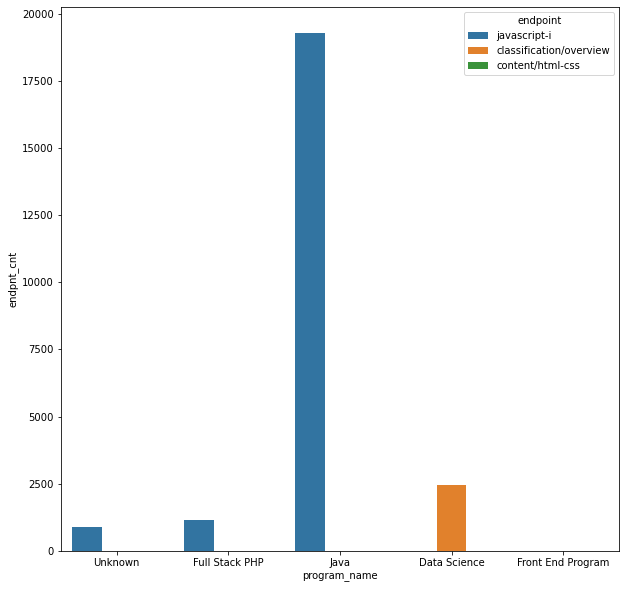

In [28]:
plt.figure(figsize=(10,10))
sns.barplot(x ='program_name', y = 'endpnt_cnt', data = most_views_df,hue = 'endpoint' ,)
plt.show()

**Takeaways**
- javascript-i was the most access lesson by program  fullStack and Java, also for the unknown
- classification was the he most access lesson by Data Science program 

**7. Which lessons are least accessed?**

In [29]:
# create a datafrme that has the count by endpoint
endpoint_df = pd.DataFrame(df.endpoint.value_counts())

In [30]:
#df[(df.endpoint != '/') & (df.endpoint != 'search/search_index.json') ].groupby('endpoint').count().sort_values(by = 'user_id', ascending= False)

In [31]:
endpoint_df.head()

,endpoint
javascript-i,21330
html-css,15334
java-iii,15245
java-ii,14593
spring,13886


In [32]:
#reset index and rename colums
endpoint_df =endpoint_df.reset_index().rename(columns = {'endpoint' : 'ep_count', 'index': 'endpoint'})

In [33]:
endpoint_df.tail(10)

,endpoint,ep_count
2320,javascript-ii/promisesdfghjkjhgfs,1
2321,appendix/www.opensecrets.org,1
2322,htmle-css/elements,1
2323,teams,1
2324,8_ts_split,1
2325,html-css/introduction:view-page,1
2326,content/javascript-with-html.html,1
2327,student-page,1
2328,10_Projects,1
2329,content/appendix/javascript/functions/templati...,1


In [34]:
#get a df with the least accessed endpoint 
least_accessed = endpoint_df[endpoint_df.ep_count  == 1]

In [35]:
#endpoint_df[endpoint_df.ep_count  == 2]

In [36]:

#endpoint_df[endpoint_df.ep_count  == 3]

In [37]:
least_accessed

,endpoint,ep_count
1836,hfdgafdja,1
1837,slides/form,1
1838,quizes,1
1839,coding-challenges/professional,1
1840,students/300/notes,1
...,...,...
2325,html-css/introduction:view-page,1
2326,content/javascript-with-html.html,1
2327,student-page,1
2328,10_Projects,1


In [38]:
#getting the list wiht the endpoint
en_list = least_accessed['endpoint'].to_list()

In [39]:
df.head()

,endpoint,user_id,cohort_id,source_ip,name,start_date,end_date,created_at,updated_at,program_id
date,,,,,,,,,,
2018-01-26,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0
2018-01-26,javascript-i/loops,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0


In [40]:
#compare 
df['endpoint'][df['endpoint'] == en_list[0]]


date
2018-05-31    hfdgafdja
Name: endpoint, dtype: object

In [41]:
#create a for loop to get the whole information about the least accessed endpoint
least_views_df= pd.DataFrame()
for n in range (len(en_list)):
    x =df[df['endpoint'] == en_list[n]]
    least_views_df= pd.concat([least_views_df, x], ignore_index = False)
    

In [42]:
#sortby index so it is sort by date
least_views_df.sort_index()

,endpoint,user_id,cohort_id,source_ip,name,start_date,end_date,created_at,updated_at,program_id
date,,,,,,,,,,
2018-01-26,javascript/google-maps-api,38,21.0,97.105.19.61,Sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,2.0
2018-01-27,teams/13,1,8.0,72.177.226.58,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-30,asdf,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-31,javascript/loops,47,21.0,97.105.19.61,Sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,2.0
2018-02-07,home,53,14.0,97.105.19.61,Lassen,2016-07-18,2016-11-10,2016-07-18 19:06:27,2016-07-18 19:06:27,1.0
...,...,...,...,...,...,...,...,...,...,...
2021-06-27,registerr,53,28.0,65.43.115.179,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2.0
2021-07-01,fitbit-data,910,137.0,69.232.101.215,Florence,2021-03-15,2021-09-03,2021-03-15 18:18:20,2021-03-15 18:18:20,3.0
2021-07-06,regression/acquire-and-prep-old,851,133.0,130.45.49.89,Easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,3.0


In [43]:
#we can see the least accessed endpoint by program
least_views_df.groupby('program_id')[['endpoint']].count()

,endpoint
program_id,
0.0,45
1.0,66
2.0,318
3.0,65


In [44]:
#we can see the least accessed endpoint by cohort
least_views_df.groupby('cohort_id')[['endpoint']].count()

,endpoint
cohort_id,
1.0,12
7.0,9
8.0,14
12.0,1
13.0,10
14.0,14
15.0,1
17.0,4
18.0,1


In [45]:
least_views_df[['endpoint',	'user_id',	'cohort_id','source_ip','name', 'program_id']].head()

,endpoint,user_id,cohort_id,source_ip,name,program_id
date,,,,,,
2018-05-31,hfdgafdja,134,23.0,97.105.19.61,Ulysses,2.0
2020-08-05,slides/form,428,28.0,70.121.183.95,Staff,2.0
2019-04-15,quizes,64,28.0,97.105.19.58,Staff,2.0
2021-06-21,coding-challenges/professional,804,132.0,66.69.1.31,Kalypso,2.0
2019-05-02,students/300/notes,372,NaN,97.105.19.58,NaN,0.0


In [46]:
print('the least accessed lessons are ', len(least_views_df))
display (least_views_df[['endpoint','user_id','cohort_id','source_ip','name', 'program_id']].sort_index())

the least accessed lessons are  494


,endpoint,user_id,cohort_id,source_ip,name,program_id
date,,,,,,
2018-01-26,javascript/google-maps-api,38,21.0,97.105.19.61,Sequoia,2.0
2018-01-27,teams/13,1,8.0,72.177.226.58,Hampton,1.0
2018-01-30,asdf,1,8.0,97.105.19.61,Hampton,1.0
2018-01-31,javascript/loops,47,21.0,97.105.19.61,Sequoia,2.0
2018-02-07,home,53,14.0,97.105.19.61,Lassen,1.0
...,...,...,...,...,...,...
2021-06-27,registerr,53,28.0,65.43.115.179,Staff,2.0
2021-07-01,fitbit-data,910,137.0,69.232.101.215,Florence,3.0
2021-07-06,regression/acquire-and-prep-old,851,133.0,130.45.49.89,Easley,3.0


**3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?**

In [47]:
#first get  a df that have  the students that access when the studens where active

In [48]:
df[(df.index >= df.start_date) & (df.index <=df.end_date)]

,endpoint,user_id,cohort_id,source_ip,name,start_date,end_date,created_at,updated_at,program_id
date,,,,,,,,,,
2018-01-26,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0
2018-01-26,javascript-i/loops,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0
2018-01-26,javascript-i/conditionals,3,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0
2018-01-26,javascript-i/functions,3,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0
2018-01-26,javascript-i/loops,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0
...,...,...,...,...,...,...,...,...,...,...
2021-07-15,anomaly-detection/continuous-probabilistic-met...,909,137.0,122.254.74.26,Florence,2021-03-15,2021-09-03,2021-03-15 18:18:20,2021-03-15 18:18:20,3.0
2021-07-15,java-iii/finish-the-adlister,925,138.0,24.26.246.133,Neptune,2021-03-15,2021-09-03,2021-03-15 19:57:09,2021-03-15 19:57:09,2.0
2021-07-15,java-ii/arrays,933,138.0,72.190.28.51,Neptune,2021-03-15,2021-09-03,2021-03-15 19:57:09,2021-03-15 19:57:09,2.0


In [49]:
#create a df
active_df = df[(df.index >= df.start_date) & (df.index <=df.end_date)]

In [50]:
#we dont have missing values
a.miss_dup_values(active_df)

Your selected dataframe has 10 columns.
There are 0 columns that have missing values.
  
** There are 497829 duplicate rows that represents 78.23% of total Values**


,Missing Values,% of Total Values


In [51]:
#group by user_id and count how many times they access the curriculum
low_user = active_df.groupby('user_id')[['endpoint']].count()

In [52]:
low_user

,endpoint
user_id,
2,1452
3,1442
4,633
5,1489
6,1201
...,...
991,827
993,320
994,179


In [53]:
#user that when they were active hardly use the curriculum
low_user[low_user['endpoint']<10]

,endpoint
user_id,
278,3
388,7
539,3
679,4
697,7
812,7
832,2
941,9
956,3


In [54]:
u = list(low_user[low_user['endpoint']<10].index)

In [55]:
u

[278, 388, 539, 679, 697, 812, 832, 941, 956]

In [56]:
#create a for loop to get the whole information about the least accessed endpoint
least_views= pd.DataFrame()
for n in u:
    x =df[df['user_id'] == n]
    least_views= pd.concat([least_views, x], ignore_index = False)

In [57]:
least_views

,endpoint,user_id,cohort_id,source_ip,name,start_date,end_date,created_at,updated_at,program_id
date,,,,,,,,,,
2018-09-27,java-ii/arrays,278,24.0,107.77.217.9,Voyageurs,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,2.0
2018-09-27,java-ii/arrays,278,24.0,107.77.217.9,Voyageurs,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,2.0
2018-09-27,java-ii/collections,278,24.0,107.77.217.9,Voyageurs,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,2.0
2018-10-16,javascript-ii,278,24.0,67.11.175.66,Voyageurs,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,2.0
2018-10-16,javascript-ii/es6,278,24.0,67.11.175.66,Voyageurs,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,2.0
...,...,...,...,...,...,...,...,...,...,...
2021-03-15,java-iii/mvc/servlets-with-jsps,941,138.0,136.50.53.26,Neptune,2021-03-15,2021-09-03,2021-03-15 19:57:09,2021-03-15 19:57:09,2.0
2021-03-15,java-iii/user-input,941,138.0,136.50.53.26,Neptune,2021-03-15,2021-09-03,2021-03-15 19:57:09,2021-03-15 19:57:09,2.0
2021-04-15,javascript-i/introduction/operators,956,139.0,162.200.114.251,Oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,2.0


In [58]:
 pd.DataFrame(least_views.groupby('program_id')['user_id'].value_counts()).rename(columns = {'user_id':'cnt'}).reset_index()

,program_id,user_id,cnt
0,2.0,278,63
1,2.0,539,60
2,2.0,812,16
3,2.0,941,9
4,2.0,388,7
5,2.0,956,3
6,2.0,832,2
7,3.0,697,7
8,3.0,679,4


In [59]:
 pd.DataFrame(least_views.groupby('cohort_id')['user_id'].value_counts()).rename(columns = {'user_id':'cnt'})

cnt
cohort_id user_id     
24.0      278       63
28.0      539       57
31.0      388        7
52.0      539        3
58.0      812       16
59.0      697        7
          679        4
62.0      832        2
138.0     941        9
139.0     956        3

In [60]:
pl = pd.DataFrame(least_views.groupby('program_id')['user_id'].value_counts()).rename(columns = {'user_id':'cnt'}).reset_index()

In [61]:
pl

,program_id,user_id,cnt
0,2.0,278,63
1,2.0,539,60
2,2.0,812,16
3,2.0,941,9
4,2.0,388,7
5,2.0,956,3
6,2.0,832,2
7,3.0,697,7
8,3.0,679,4


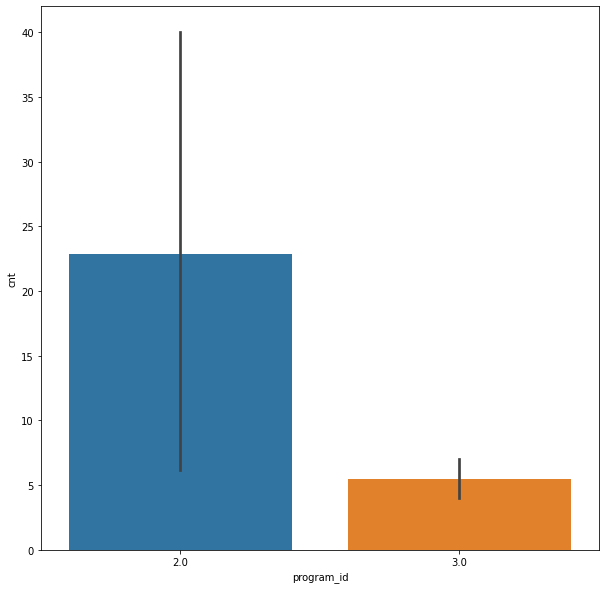

In [62]:
plt.figure(figsize=(10,10))
sns.barplot(x ='program_id', y = 'cnt', data = pl)
plt.show()

**takeaways**
- program Java has more users that hardly accessed the curriculum while they were active

## 8. Anything else I should be aware of?

**cohort_id**

In [63]:
df.cohort_id.value_counts().sort_index()

1.0      17716
2.0         74
4.0          2
6.0         67
7.0        743
8.0       1467
9.0          4
11.0       227
12.0       291
13.0      2608
14.0      9399
15.0       652
16.0       701
17.0      4649
18.0      2063
19.0      1177
21.0      6554
22.0     28596
23.0     25968
24.0     32741
25.0     23028
26.0     25860
27.0     18810
28.0     80747
29.0     34160
31.0     23234
32.0     27372
33.0     36879
34.0     21968
51.0     32221
52.0     25141
53.0     32663
55.0     17438
56.0     30439
57.0     31142
58.0     26984
59.0     24591
61.0     16319
62.0     34503
132.0    22940
133.0    13527
134.0    19529
135.0    30600
137.0    15068
138.0    21291
139.0    16479
165.0     5376
166.0     1540
Name: cohort_id, dtype: int64

**Note:**

    - we can see the cohort numbers are not consecutive
    - missing 10, 20, 30, 35-50, 60, 63-131, 140-164

In [64]:
cohort_df = pd.DataFrame(df.cohort_id.value_counts().sort_values(ascending=False)).reset_index()

In [65]:
cohort_df.rename(columns= {'cohort_id': 'endpoint_count', 'index':'cohort_id'})

,cohort_id,endpoint_count
0,28.0,80747
1,33.0,36879
2,62.0,34503
3,29.0,34160
4,24.0,32741
5,53.0,32663
6,51.0,32221
7,57.0,31142
8,135.0,30600
9,56.0,30439


**user_id**

In [67]:
u_df = df.groupby(by=['cohort_id','user_id']).count()[['endpoint']]


In [68]:
u_df.head()

endpoint
cohort_id user_id          
1.0       11           2450
          51            212
          60            450
          64           3500
          95              5

In [75]:
u_df.loc[1.0]

,endpoint
user_id,
11,2450
51,212
60,450
64,3500
95,5
141,7
146,50
148,66
170,35


In [76]:
len(u_df.loc[1.0])

48

In [80]:
cid = list(df.cohort_id.value_counts().index)

In [109]:
df_cu = pd.DataFrame(columns= {'cohort_id', 'total_users'})

In [110]:
df_cu

,total_users,cohort_id


In [113]:
co=8

In [114]:
df_cu['cohort_id'] = co

In [115]:
df_cu

,total_users,cohort_id


In [ ]:
df_cu['total_users'] = len(u_df.loc[co])

In [ ]:
display(df_cu)

In [ ]:
d = {'key': 'value'}
print(d)  # {'key': 'value'}

d['mynewkey'] = 'mynewvalue'

In [ ]:
cohort_user= pd.concat([cohort_user, df_cu], ignore_index = False) 

In [95]:
cohort_user = pd.DataFrame()
for co in cid:
    print(co)
    print(len(u_df.loc[co]))
    df_cu = pd.DataFrame()
    df_cu['cohort_id'] = co
    df_cu['total_users'] = len(u_df.loc[co])
    display(df_cu)
    cohort_user= pd.concat([cohort_user, df_cu], ignore_index = False) 


28.0
57


,cohort_id,total_users


33.0
29


,cohort_id,total_users


62.0
33


,cohort_id,total_users


29.0
25


,cohort_id,total_users


24.0
33


,cohort_id,total_users


53.0
29


,cohort_id,total_users


51.0
27


,cohort_id,total_users


57.0
28


,cohort_id,total_users


135.0
31


,cohort_id,total_users


56.0
24


,cohort_id,total_users


22.0
35


,cohort_id,total_users


32.0
22


,cohort_id,total_users


58.0
23


,cohort_id,total_users


23.0
33


,cohort_id,total_users


26.0
20


,cohort_id,total_users


52.0
28


,cohort_id,total_users


59.0
29


,cohort_id,total_users


31.0
28


,cohort_id,total_users


25.0
26


,cohort_id,total_users


132.0
24


,cohort_id,total_users


34.0
23


,cohort_id,total_users


138.0
35


,cohort_id,total_users


134.0
20


,cohort_id,total_users


27.0
29


,cohort_id,total_users


1.0
48


,cohort_id,total_users


55.0
21


,cohort_id,total_users


139.0
33


,cohort_id,total_users


61.0
23


,cohort_id,total_users


137.0
22


,cohort_id,total_users


133.0
17


,cohort_id,total_users


14.0
12


,cohort_id,total_users


21.0
28


,cohort_id,total_users


165.0
29


,cohort_id,total_users


17.0
13


,cohort_id,total_users


13.0
9


,cohort_id,total_users


18.0
14


,cohort_id,total_users


166.0
27


,cohort_id,total_users


8.0
5


,cohort_id,total_users


19.0
17


,cohort_id,total_users


7.0
6


,cohort_id,total_users


16.0
8


,cohort_id,total_users


15.0
5


,cohort_id,total_users


12.0
5


,cohort_id,total_users


11.0
5


,cohort_id,total_users


2.0
3


,cohort_id,total_users


6.0
2


,cohort_id,total_users


9.0
1


,cohort_id,total_users


4.0
1


,cohort_id,total_users


In [91]:
cohort_user

,cohort_id,total_users


## missing values 

In [ ]:
#let's see by user_id all the missing values
miss_user = df[df.cohort_id.isnull()].groupby('user_id').count()

In [ ]:
miss_user.head(10)

**there are 78 users wiht missing cohort_id missing values**

In [ ]:
#let's check one user

In [ ]:
#these are all the logs for that user
df[df.user_id == 814]

In [ ]:
# if we do a sum we can get if cohor_id,  had had a value in any other log 
df[['cohort_id']][df.user_id == 48].sum()

In [ ]:
# GET THE VALUE
df[['cohort_id']][df.user_id == 48].sum()[0]

In [ ]:
#get the user_id for missing values
index_list = list(miss_user.index)

In [ ]:
#Lets check if there are any users that have other value in cohort
user_list =[]
for ind in index_list:
    if (df[['cohort_id']][df.user_id == ind].sum()[0] != 0):
        user_list.append(ind)

 

In [ ]:
#this list has the user_ids that had cohort values in other logs
user_list

In [ ]:
#we can see this user had had cohort ids
df[df.user_id == 64].nunique()

In [ ]:
pd.DataFrame(df[['cohort_id', 'name', 'program_id']][df.user_id == 64].value_counts())

In [ ]:
df[(df.cohort_id == 52) & (df.user_id == 64)]

In [ ]:
df[(df.name == 'Staff') & (df.user_id == 64)]

In [ ]:
df[(df.cohort_id.isnull()) &(df.user_id == 64)]

In [ ]:
df[['source_ip']][df.user_id == 814].value_counts()

In [ ]:
pd.DataFrame(df[['cohort_id', 'name', 'program_id']][df.user_id == 64].value_counts()).reset_index().rename(columns = {0:'counts'})

In [ ]:
print('************************ REPORT OF THE USERS ************************')
print('')
for user in user_list:
    print('****  user_id:', user,'****')
    an = pd.DataFrame(df[['cohort_id', 'name', 'program_id']][df.user_id == user].value_counts()).reset_index().rename(columns = {0:'counts'})
    display(an)
    print('------------------------------------------')
    print('')

**takeaways**
- there are 78 users with missing cohort_id values but 9 users have another cohort assigned
- with more time we can see when was the las access with a cohort assigned
- there are missing cohort numbers